In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math

2023-04-01 08:28:08.769602: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-01 08:28:08.801806: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-01 08:28:08.803019: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-01 08:28:09.717074: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


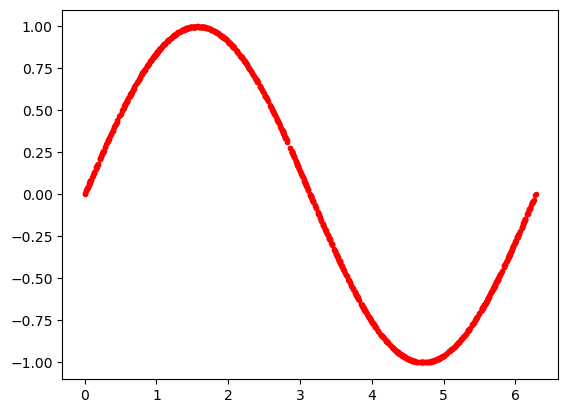

In [2]:
SAMPLES = 1000

x_values = np.random.uniform(low=0, high=2*math.pi, size=SAMPLES)
np.random.shuffle(x_values)
y_values = np.sin(x_values)

plt.plot(x_values, y_values, 'r.')
plt.show()  

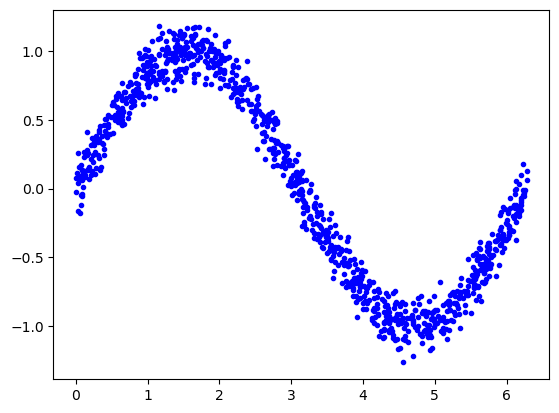

In [3]:
y_values += 0.1 * np.random.randn(*y_values.shape)

plt.plot(x_values, y_values, 'b.')
plt.show()

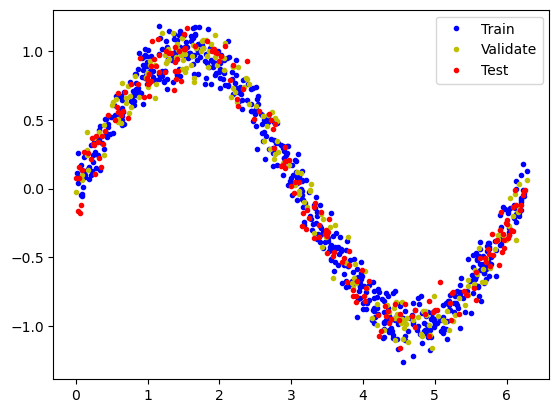

In [4]:
TRAIN_SPLIT = int(0.6 * SAMPLES)
TEST_SPLIT = int(0.2 * SAMPLES + TRAIN_SPLIT)

x_train, x_validate, x_test = np.split(x_values, [TRAIN_SPLIT, TEST_SPLIT])
y_train, y_validate, y_test = np.split(y_values, [TRAIN_SPLIT, TEST_SPLIT])

assert (x_train.size + x_validate.size + x_test.size) == SAMPLES

plt.plot(x_train, y_train, 'b.', label="Train")
plt.plot(x_validate, y_validate, 'y.', label="Validate")
plt.plot(x_test, y_test, 'r.', label="Test")
plt.legend()
plt.show()

In [5]:
from tensorflow.keras import layers

model = tf.keras.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(1,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 16)                272       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 593
Trainable params: 593
Non-trainable params: 0
_________________________________________________________________


In [6]:
history = model.fit(x_train, y_train, 
                    epochs=600, batch_size=16,
                    validation_data=(x_validate, y_validate))

Epoch 1/600
38/38 [==============================] - 1s 5ms/step - loss: 0.4477 - mae: 0.5823 - val_loss: 0.4273 - val_mae: 0.5762
Epoch 2/600
38/38 [==============================] - 0s 2ms/step - loss: 0.3292 - mae: 0.4941 - val_loss: 0.3337 - val_mae: 0.5050
Epoch 3/600
38/38 [==============================] - 0s 2ms/step - loss: 0.2547 - mae: 0.4362 - val_loss: 0.2491 - val_mae: 0.4402
Epoch 4/600
38/38 [==============================] - 0s 2ms/step - loss: 0.2023 - mae: 0.3907 - val_loss: 0.1966 - val_mae: 0.3880
Epoch 5/600
38/38 [==============================] - 0s 2ms/step - loss: 0.1714 - mae: 0.3560 - val_loss: 0.1653 - val_mae: 0.3503
Epoch 6/600
38/38 [==============================] - 0s 2ms/step - loss: 0.1523 - mae: 0.3277 - val_loss: 0.1465 - val_mae: 0.3240
Epoch 7/600
38/38 [==============================] - 0s 2ms/step - loss: 0.1437 - mae: 0.3166 - val_loss: 0.1353 - val_mae: 0.3062
Epoch 8/600
38/38 [==============================] - 0s 2ms/step - loss: 0.1352 - m

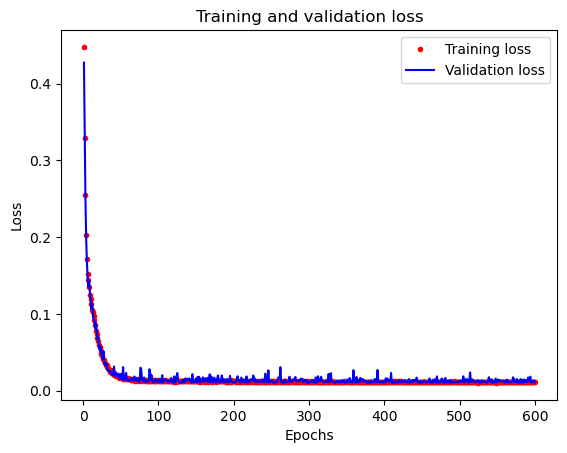

In [7]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'r.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

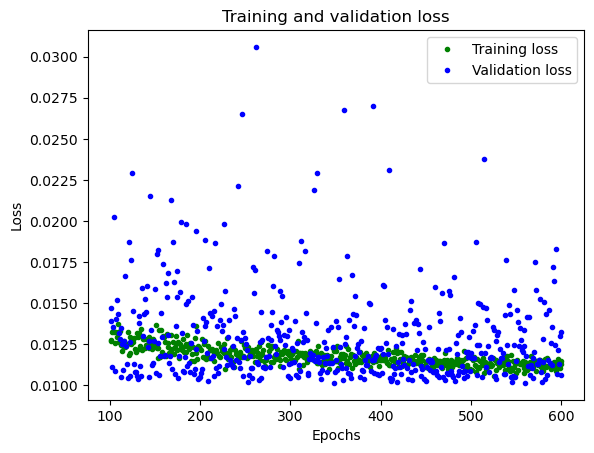

In [8]:
SKIP = 100

plt.clf()

plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

7/7 [==============================] - 0s 1ms/step


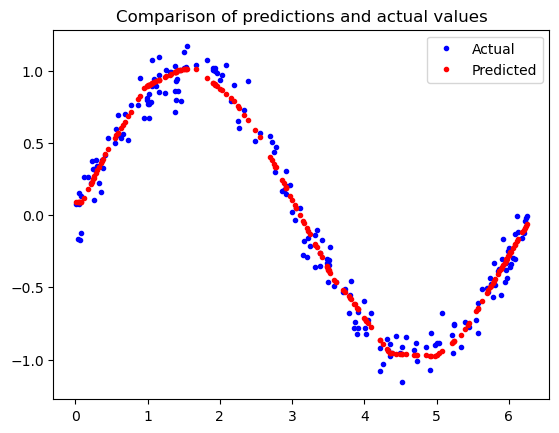

In [9]:
loss = model.evaluate(x_test, y_test)
predictions = model.predict(x_test)

plt.clf()
plt.title('Comparison of predictions and actual values')
plt.plot(x_test, y_test, 'b.', label='Actual')
plt.plot(x_test, predictions, 'r.', label='Predicted')
plt.legend()
plt.show()

In [10]:
# create an output directory
!mkdir output

mkdir: cannot create directory ‘output’: File exists


In [11]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open("output/sine_model.tflite", "wb").write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpop9jy8qx/assets


INFO:tensorflow:Assets written to: /tmp/tmpop9jy8qx/assets
2023-04-01 08:29:01.066373: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
2023-04-01 08:29:01.066427: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.
2023-04-01 08:29:01.066724: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /tmp/tmpop9jy8qx
2023-04-01 08:29:01.067380: I tensorflow/cc/saved_model/reader.cc:89] Reading meta graph with tags { serve }
2023-04-01 08:29:01.067391: I tensorflow/cc/saved_model/reader.cc:130] Reading SavedModel debug info (if present) from: /tmp/tmpop9jy8qx
2023-04-01 08:29:01.070708: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:353] MLIR V1 optimization pass is not enabled
2023-04-01 08:29:01.071540: I tensorflow/cc/saved_model/loader.cc:231] Restoring SavedModel bundle.
2023-04-01 08:29:01.097801: I tensorflow/cc/saved_model/loader.cc:215] Running initializatio

4656

In [12]:
!apt-get -qq install xxd
# Save the file as a C source file
!xxd -i output/sine_model.tflite > output/sine_model.cc

E: Could not open lock file /var/lib/dpkg/lock-frontend - open (13: Permission denied)
E: Unable to acquire the dpkg frontend lock (/var/lib/dpkg/lock-frontend), are you root?
